In [ ]:

# ----------------------------------------------------------------------------------------------------------
#
#            Script to get coordinates from RVIC netcdf output
#                                     March 2016
#                                    Ryan Niemeyer
#
# ----------------------------------------------------------------------------------------------------------


In [61]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap as bm
import matplotlib.pyplot as plt
import xarray as xr

In [51]:
pwd()

'/home/raid3/rniemeyr/practice'

In [21]:
# dset = xray.open_dataset("/raid2/ymao/VIC_RBM_east_RIPS/RIPS/model_run/param/RVIC/Wu_8th/Tennessee/param_run_output_grid/temp/remapped/ncview remapUH_36.0625_-83.6875.nc"                
startdate = '1991-10-01'
enddate = '2001-09-30'
energy_fluxes = xr.open_dataset("/raid2/ymao/VIC_RBM_east_RIPS/RIPS/model_run/output/vic/Tennessee.calibrated_1961_1970/run_1949_2010.Tennessee.21dams.adjust_negative.bug_fixed/nc/energy.19490101-20101231.nc")
flow_fluxes = xr.open_dataset("/raid2/ymao/VIC_RBM_east_RIPS/RIPS/model_run/output/vic/Tennessee.calibrated_1961_1970/run_1949_2010.Tennessee.21dams.adjust_negative.bug_fixed/nc/flow.19490101-20101231.nc")
mask = xr.open_dataset("/raid2/ymao/VIC_RBM_east_RIPS/RIPS/model_run/param/RVIC/Wu_8th/Tennessee/param_run_output_grid/temp/remapped/remapUH_36.0625_-83.6875.nc")


In [63]:
# cre

energy_fluxes = energy_fluxes.where(mask.fraction).sel(lat=slice(36,37), lon=slice(-83.75,-81.5),
                                                              time=pd.date_range(start=startdate, end=enddate))

flow_fluxes = flow_fluxes.where(mask.fraction).sel(lat=slice(36,37), lon=slice(-83.75,-81.5),
                                                              time=pd.date_range(start=startdate, end=enddate))

In [35]:
data = energy_fluxes['Shortwave'].sel(lat=slice(36,37), lon=slice(-83.75,-81.5),
                                       time=pd.date_range(start=startdate, end=enddate)).mean(dim='time')

In [73]:
data = flow_fluxes['Runoff'].sel(lat=slice(36,37), lon=slice(-83.75,-81.5),
                                       time=pd.date_range(start=startdate, end=enddate)).mean(dim='time')

<xarray.DataArray 'Shortwave' (lat: 8, lon: 18)>
array([[ 184.76238195,  181.82316547,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan,           nan],
       [ 179.54975237,  179.56135654,  179.52926512,  182.01857037,
                  nan,           nan,           nan,           nan,
                  nan,           nan,           nan,           nan,
         183.10062134,  180.47729963,  180.30306958,  182.31573086,
                  nan,           nan],
       [          nan,           nan,  180.735345  ,  179.68632879,
         180.12365998,  182.73416428,  184.33115462,           nan,
                  nan,           nan,  184.15966411,  183.63815785,
         183.43453484,  181.42297729,  181.0097593 ,  186.54591896,
                  nan,           nan],
       [          

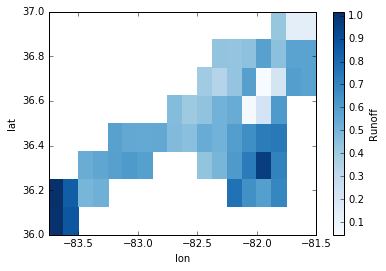

In [74]:
# fig, axarr = plt.subplots(1,1, figsize=(20,4))


data.plot(cmap=plt.cm.Blues )

# div = make_axes_locatable(ax)
# ax.set_title(variable)
# cax = div.append_axes("right", size="8%", pad=0.05)
# cbar = plt.colorbar(plot, cax=cax)
# cbar.set_label(variable+' [mm/day]')



In [ ]:
variables = ['Precipitation', 'Baseflow', 'Runoff', 'Evaporation', 'Inverse Runoff']
fig, axarr = plt.subplots(1,5, figsize=(20,4))
for i,variable in enumerate(variables):
    ax = axarr[i]
    
    if variable=='Inverse Runoff':
        data = inverse_runoff_masked.sel(lat=slice(42.4,44.8), lon=slice(-113.2,-109.75),
                                     time=pd.date_range(start=startdate, end=enddate)).mean(dim='time')
    else:
        data = calibrated_fluxes[variable].sel(lat=slice(42.4,44.8), lon=slice(-113.2,-109.75),
                             time=pd.date_range(start=startdate, end=enddate)).mean(dim='time')
#     data = data.where(mask)
    plot = data.plot(ax=ax, add_colorbar=False)
    div = make_axes_locatable(ax)
    ax.set_title(variable)
    cax = div.append_axes("right", size="8%", pad=0.05)
    cbar = plt.colorbar(plot, cax=cax)
    cbar.set_label(variable+' [mm/day]')
plt.suptitle('Water balance terms for area upstream of the Snake at American Falls (avg. WY 1992-2001)', fontsize=16)

plt.tight_layout()
plt.subplots_adjust(top=0.87)
plt.savefig(fig_dir+datestamp()+'_AMFI_waterbalance_variables.png')

In [64]:
energy_fluxes.data_vars
flow_fluxes.data_vars

Data variables:
    frac           (lat, lon) float64 1.0 1.0 nan nan nan nan nan nan nan ...
    mask           (lat, lon) float64 1.0 1.0 nan nan nan nan nan nan nan ...
    area           (lat, lon) float64 1.562e+08 1.562e+08 nan nan nan nan ...
    Precipitation  (time, lat, lon) float64 0.0 0.0 nan nan nan nan nan nan ...
    Evaporation    (time, lat, lon) float64 2.0 1.643 nan nan nan nan nan ...
    Runoff         (time, lat, lon) float64 0.0 0.0 nan nan nan nan nan nan ...
    Baseflow       (time, lat, lon) float64 0.0077 0.0236 nan nan nan nan ...

In [31]:
type(flow_fluxes)

xarray.core.dataset.Dataset